## Data Science and Public Policy
## Data Assignment #1
## Fiona Fang

### Preparation

In [1]:
# Import python libraries
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Import the data
data_path = '/Users/jiaying/Desktop/6506 DSPP/Data Assignment #1/Raw data/fox8_23_dataset.ndjson'
data = pd.read_json(data_path, lines=True)


The data includes information on 2280 Twitter accounts -- half of which belonged to humans and half to the bot network.

In [3]:
# First 5 rows
data.head(5)


,user_id,label,dataset,user_tweets
0,16905397,human,botometer-feedback,"[{'contributors': None, 'truncated': True, 'te..."
1,2717053344,human,botometer-feedback,"[{'contributors': None, 'truncated': False, 't..."
2,297051227,human,botometer-feedback,"[{'contributors': None, 'truncated': False, 't..."
3,282275320,human,botometer-feedback,"[{'contributors': None, 'truncated': False, 't..."
4,1663020151,human,botometer-feedback,"[{'contributors': None, 'truncated': False, 't..."


In [4]:
# Last 5 rows
data.tail(5)


,user_id,label,dataset,user_tweets
2275,1094461878,bot,fox8,"[{'contributors': None, 'truncated': False, 't..."
2276,729988381,bot,fox8,"[{'contributors': None, 'truncated': False, 't..."
2277,3105418328,bot,fox8,"[{'contributors': None, 'truncated': False, 't..."
2278,1093925310,bot,fox8,"[{'contributors': None, 'truncated': False, 't..."
2279,834229890,bot,fox8,"[{'contributors': None, 'truncated': False, 't..."


### EDA

In [12]:
# View the user_tweets column
tweet_content = data.at[0, 'user_tweets']
print(tweet_content)


[{'contributors': None, 'truncated': True, 'text': '@christophkoeck In Diskussionen in D erlebe ich eine starke Tendenz, den fachwissenschaftlichen Teil des Studiums e… https://t.co/mnrFupSXIn', 'is_quote_status': False, 'in_reply_to_status_id': 986480373927378945, 'id': 986607535674322945, 'favorite_count': 0, 'source': '<a href="http://twitter.com/#!/download/ipad" rel="nofollow">Twitter for iPad</a>', 'retweeted': False, 'coordinates': None, 'entities': {'symbols': [], 'user_mentions': [{'id': 927857246, 'indices': [0, 15], 'id_str': '927857246', 'screen_name': 'christophkoeck', 'name': 'Christoph Koeck'}], 'hashtags': [], 'urls': [{'url': 'https://t.co/mnrFupSXIn', 'indices': [117, 140], 'expanded_url': 'https://twitter.com/i/web/status/986607535674322945', 'display_url': 'twitter.com/i/web/status/9…'}]}, 'in_reply_to_screen_name': 'christophkoeck', 'in_reply_to_user_id': 927857246, 'retweet_count': 0, 'id_str': '986607535674322945', 'favorited': False, 'user': {'follow_request_sen

In [6]:
# Extract the list of tweets for the first row
tweets_list = data.at[0, 'user_tweets']

# Separate each tweet and summarize the information
for tweet in tweets_list:
    print("Tweet Text:", tweet['text'])
    hashtags = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    urls = [url['url'] for url in tweet['entities']['urls']]
    print("Hashtags:", hashtags)
    print("URLs:", urls)
    print("Favorite Count:", tweet['favorite_count'])
    print("Retweet Count:", tweet['retweet_count'])
    print("----")


Tweet Text: @christophkoeck In Diskussionen in D erlebe ich eine starke Tendenz, den fachwissenschaftlichen Teil des Studiums e… https://t.co/mnrFupSXIn
Hashtags: []
URLs: ['https://t.co/mnrFupSXIn']
Favorite Count: 0
Retweet Count: 0
----
Tweet Text: Zwei Lehrerinnen, zwölf Schüler und ein paar Schafe https://t.co/jTtda7l22s #EDchatDE #twitterlehrerzimmer
Hashtags: ['EDchatDE', 'twitterlehrerzimmer']
URLs: ['https://t.co/jTtda7l22s']
Favorite Count: 1
Retweet Count: 0
----
Tweet Text: Antisemitismus in Deutschland =&gt; Adam Armush: "Ich will mich nicht verstecken" https://t.co/CGx2FQAk1a
Hashtags: []
URLs: ['https://t.co/CGx2FQAk1a']
Favorite Count: 1
Retweet Count: 2
----
Tweet Text: Bayerische Politik und ihr Menschenbild – Das neue Psychiatriegesetz lässt tief in die Mentalität blicken, die da v… https://t.co/x7bkXVCN88
Hashtags: []
URLs: ['https://t.co/x7bkXVCN88']
Favorite Count: 0
Retweet Count: 1
----
Tweet Text: Es kommt doch auf den Lehrer an! #EDchatDE #Twitterlehrerzimmer


You can, for example, create plots that visualize how much content human and bot accounts produced and how much engagement they received on the platform. 

You can also use topic models or other NLP methods to examine the topics on which they focused and the language that they used. These are just some ideas -- feel free to be creative!


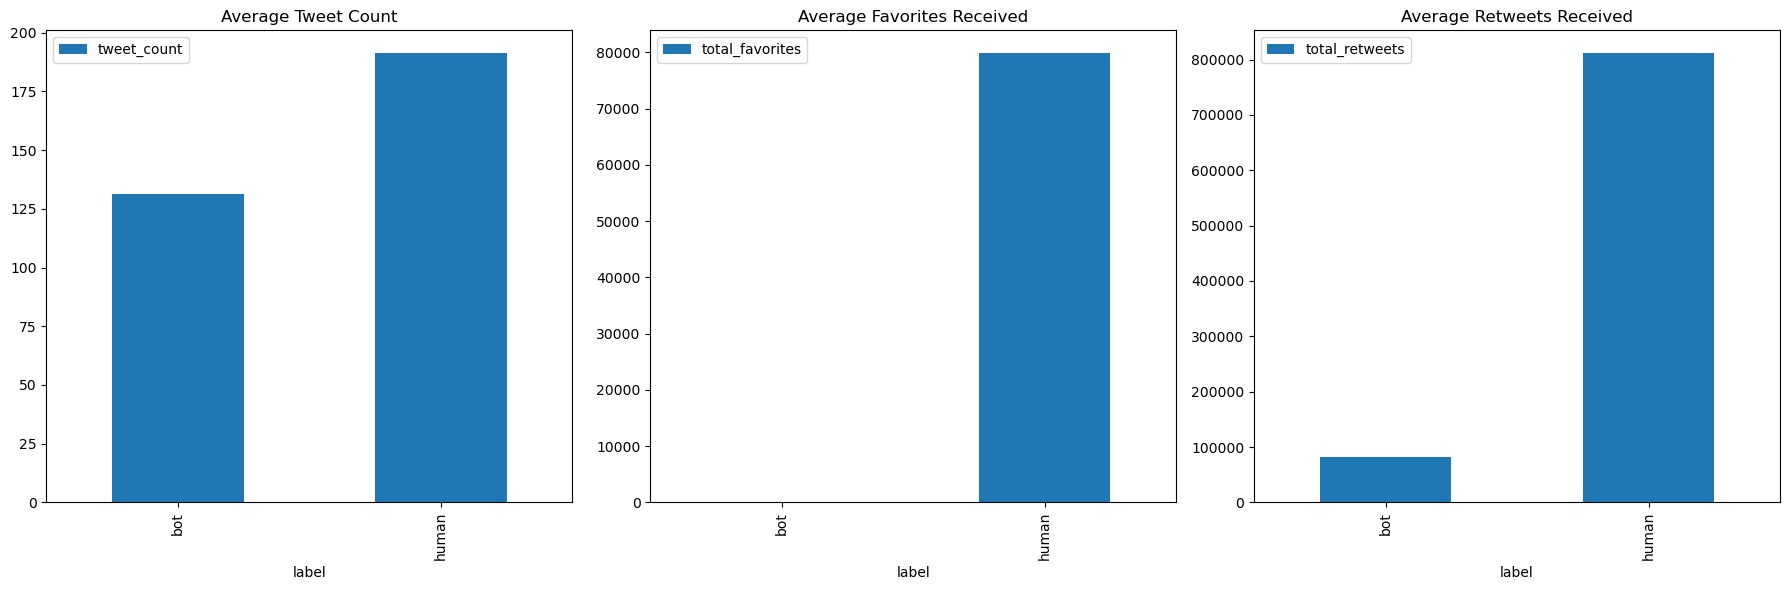

In [8]:
# Initialize lists to store aggregated data
user_ids, labels, tweet_counts, total_favorites, total_retweets = [], [], [], [], []

# Iterate through each account in the DataFrame
for index, row in data.iterrows():
    user_id = row['user_id']
    label = row['label']
    tweets = row['user_tweets']
    
    # Initialize counters for each account
    fav_count = 0
    rt_count = 0
    
    # Sum up favorite and retweet counts for each tweet
    for tweet in tweets:
        fav_count += tweet.get('favorite_count', 0)
        rt_count += tweet.get('retweet_count', 0)
    
    # Append aggregated data
    user_ids.append(user_id)
    labels.append(label)
    tweet_counts.append(len(tweets))
    total_favorites.append(fav_count)
    total_retweets.append(rt_count)

# Create a summary DataFrame
summary_df = pd.DataFrame({
    'user_id': user_ids,
    'label': labels,
    'tweet_count': tweet_counts,
    'total_favorites': total_favorites,
    'total_retweets': total_retweets
})

# Aggregate data by label
aggregated_data = summary_df.groupby('label').agg({
    'tweet_count': 'mean',
    'total_favorites': 'mean',
    'total_retweets': 'mean'
}).reset_index()

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot for tweet counts
aggregated_data.plot(kind='bar', x='label', y='tweet_count', ax=axes[0], title='Average Tweet Count')

# Plot for total favorites
aggregated_data.plot(kind='bar', x='label', y='total_favorites', ax=axes[1], title='Average Favorites Received')

# Plot for total retweets
aggregated_data.plot(kind='bar', x='label', y='total_retweets', ax=axes[2], title='Average Retweets Received')

plt.tight_layout()
plt.show()


In [10]:
aggregated_data

,label,tweet_count,total_favorites,total_retweets
0,bot,131.388596,11.508772,81797.250877
1,human,191.442982,79928.094737,812351.510526


Much less favorites! 
Reasons or implications?